In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def sigmoid(x):
  return 1.0 / (2.0+np.exp(-x))

(-0.5, 1.5)

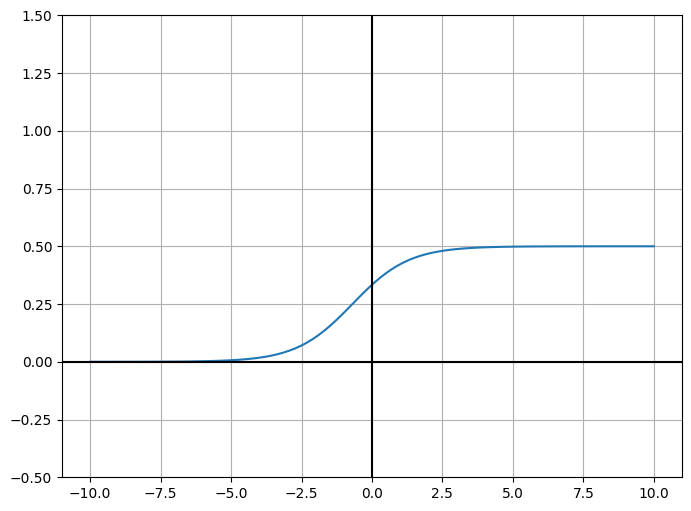

In [ ]:
vals=np.linspace(-10,10,num=100,dtype=np.float32)
activation=sigmoid(vals)
fig=plt.figure(figsize=(8,6))
plt.plot(vals,activation)
plt.grid(True, which='both')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.yticks()
plt.ylim([-0.5,1.5])

**OR GATE**

In [ ]:
def sigmoid(x):
  return 1.0 / (1.0+np.exp(-x))
def logicgate(w1,w2,b):
  return lambda x1, x2 : sigmoid(w1*x1+w2*x2+b)
def test(gate):
  for a,b in (0,0),(0,1),(1,0),(1,1):
    print("{},{}: {}".format(a,b,np.round(gate(a,b))))
or_gate=logicgate(20,20,-10)
test(or_gate)

0,0: 0.0
0,1: 1.0
1,0: 1.0
1,1: 1.0


**AND GATE**

In [ ]:
import numpy as np
def sigmoid(x):
  return 1.0 / (1.0+np.exp(-x))
def logicgate(w1,w2,b):
  return lambda x1,x2 : sigmoid(w1*x1+w2*x2+b)
def test(gate):
  for a,b in (0,0),(0,1),(1,0),(1,1):
    print("{},{}: {}".format(a,b,np.round(gate(a,b))))
and_gate=logicgate(15,15,-20)
test(and_gate)

0,0: 0.0
0,1: 0.0
1,0: 0.0
1,1: 1.0


**NAND GATE**

In [ ]:
import numpy as np
def sigmoid(x):
  return 1.0 / (1.0+np.exp(-x))
def logicgate(w1,w2,b):
  return lambda x1,x2 : sigmoid(w1*x1+w2*x2+b)
def test(gate):
  for a,b in (0,0),(0,1),(1,0),(1,1):
    print("{},{}: {}".format(a,b,np.round(gate(a,b))))
nand_gate=logicgate(15,15,-20)
test(nand_gate)

0,0: 1.0
0,1: 1.0
1,0: 1.0
1,1: 0.0


**XOR GATE**

In [ ]:
import numpy as np
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
def logicgate(w1, w2, b):
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)
def test(gate):
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{},{}: {}".format(a, b, np.round(gate(a, b))))
nand_gate = logicgate(-10, -10, 15)
or_gate = logicgate(10, 10, -5)
and_gate = logicgate(10, 10, -15)
def xor_gate(x1, x2):
    o1 = or_gate(x1, x2)
    o2 = nand_gate(x1, x2)
    return and_gate(o1, o2)
test(xor_gate)


0,0: 0.0
0,1: 1.0
1,0: 1.0
1,1: 0.0


**NOR GATE**

In [18]:
import numpy as np
def sigmoid(x):
  return 1.0 / (1.0+np.exp(-x))
def logicgate(w1,w2,b):
  return lambda x1,x2 : sigmoid(w1*x1+w2*x2+b)
def test(gate):
  for a,b in (0,0),(0,1),(1,0),(1,1):
    print("{},{}: {}".format(a,b,np.round(gate(a,b))))
nor_gate=logicgate(-10,-10,5)
test(nor_gate)

0,0: 1.0
0,1: 0.0
1,0: 0.0
1,1: 0.0


In [8]:
w1=np.array([[2,-1,-1,4],[-1,2,-3,1],[3,-2,-2,5]])
w1

array([[ 2, -1, -1,  4],
       [-1,  2, -3,  1],
       [ 3, -2, -2,  5]])

In [10]:
w2=np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
w2

array([[ 3,  1, -2,  1],
       [-2,  4,  1, -4],
       [-1, -3,  2, -5],
       [ 3,  1,  1,  1]])

In [11]:
w3=np.array([[-1,3,-2],[1,-1,3],[3,-2,-2],[1,2,1]])
w3

array([[-1,  3, -2],
       [ 1, -1,  3],
       [ 3, -2, -2],
       [ 1,  2,  1]])

In [12]:
xin=np.array([.5,.8,.2])
xin

array([0.5, 0.8, 0.2])

In [14]:
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])
x_mat_in

array([[0.5, 0.8, 0.2],
       [0.1, 0.9, 0.6],
       [0.2, 0.2, 0.3],
       [0.6, 0.1, 0.9],
       [0.5, 0.5, 0.4],
       [0.9, 0.1, 0.9],
       [0.1, 0.8, 0.7]])

In [15]:
def soft_max_vec(vec):
  return np.exp(vec)/np.sum(np.exp(vec))
def soft_max_vec_mat(mat):
  return np.apply_along_axis(soft_max_vec,1,mat)

In [16]:
def forward_pass(x_in, w_1, w_2, w_3):
    z1 = sigmoid(np.dot(x_in, w_1))
    z2 = sigmoid(np.dot(z1, w_2))
    z3 = np.dot(z2, w_3)
    output = soft_max_vec(z3)
    return output

In [19]:
output = forward_pass(xin, w1, w2, w3)
print("Single Input:\n",output)

Single Input:
 [0.61912505 0.29017165 0.09070329]


In [20]:
#Function for matrix of inputs
def forward_pass_batch(x_mat_in, w1, w2, w3):
    z1 = sigmoid(np.dot(x_mat_in, w1))
    z2 = sigmoid(np.dot(z1, w2))
    z3 = np.dot(z2, w3)
    output_batch = soft_max_vec_mat(z3)
    return output_batch

In [21]:
output_batch = forward_pass_batch(x_mat_in, w1, w2, w3)
print("Matrix of Inputs:\n",output_batch)

Matrix of Inputs:
 [[0.61912505 0.29017165 0.09070329]
 [0.54404102 0.35574937 0.10020962]
 [0.55529456 0.36036116 0.08434428]
 [0.18972686 0.72693992 0.08333322]
 [0.40527586 0.49017967 0.10454447]
 [0.17287518 0.74548252 0.0816423 ]
 [0.44775904 0.44505832 0.10718264]]
